In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
import operator
import h5py

from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, Adamax
from keras.metrics import categorical_crossentropy

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [154]:
DATADIR = 'Datasets/Dogs/Standford_Dogs/images/'

trainPath = DATADIR + 'Train'

testPath = DATADIR + 'Test'

dataClasses = os.listdir(trainPath)

X_IMG_SIZE = 200
Y_IMG_SIZE = 200
batchSize = 30

In [155]:
# Generators to load in batches of iamges at a time
dataGenerator = ImageDataGenerator(rescale = 1./ 255,
                                   validation_split = 0.1)

trainData = dataGenerator.flow_from_directory(trainPath,
                                              target_size = (X_IMG_SIZE, Y_IMG_SIZE),
                                              classes = dataClasses,
                                              batch_size = batchSize,
                                              subset = 'training',
                                              shuffle = True)
validData = dataGenerator.flow_from_directory(trainPath,
                                              target_size = (X_IMG_SIZE, Y_IMG_SIZE),
                                              classes = dataClasses,
                                              batch_size = batchSize,
                                              subset = 'validation',
                                              shuffle = True)

Found 18571 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


In [156]:
# Function to plot images and their classes
def PlotData(imgs, labels, classes, figDimension):
    plt.figure(figsize=(figDimension,figDimension))
    for i in range(len(labels)):
        plt.subplot(5,5,i+1)
        labelIndex = np.argmax(labels[i])
        plt.imshow(imgs[i])
        plt.title(dataClasses[labelIndex], color='w')
        plt.axis('off')

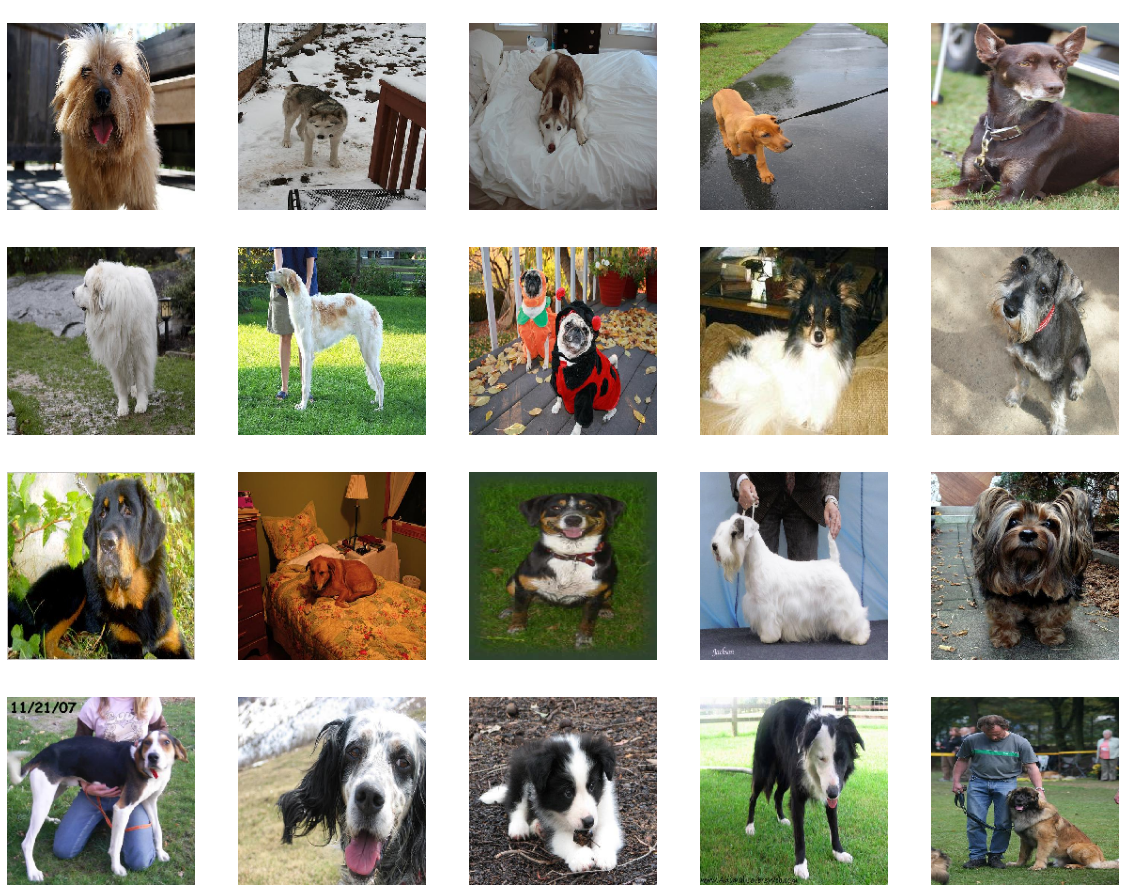

In [157]:
# Get the next batch of images and plot (mainly for testing purposes)
trainDataImgs, trainDataLabels = trainData.next()
PlotData(trainDataImgs, trainDataLabels, dataClasses, 20)

In [141]:
# Use InceptionV3
trainedModel = InceptionV3(input_shape=(X_IMG_SIZE,Y_IMG_SIZE,3),   # Remove top layer and change input shape
                    include_top=False,
                    weights='imagenet')

# Make all layers untrainable
for layer in trainedModel.layers:
    layer.trainable = False

# Add on new layers to the end of the model (the layers that will be trained)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
D1_1 = tf.keras.layers.Dropout(rate = 0.2)
prediction_layer = tf.keras.layers.Dense(120, activation = 'softmax')

model = tf.keras.Sequential([
    trainedModel,
    global_average_layer,
    D1_1,
    prediction_layer
])
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [158]:
model.fit(trainData, 
          steps_per_epoch = 40,
          validation_data = validData,
          validation_steps = 40,
          verbose = 2,
          epochs = 50)

Epoch 1/50
40/40 - 32s - loss: 0.7840 - accuracy: 0.8078 - val_loss: 1.6649 - val_accuracy: 0.7000
Epoch 2/50
40/40 - 31s - loss: 0.6455 - accuracy: 0.8200 - val_loss: 1.7893 - val_accuracy: 0.6750
Epoch 3/50
40/40 - 32s - loss: 0.7211 - accuracy: 0.7900 - val_loss: 1.7452 - val_accuracy: 0.6913
Epoch 4/50
40/40 - 33s - loss: 0.8939 - accuracy: 0.7987 - val_loss: 1.9451 - val_accuracy: 0.6737
Epoch 5/50
40/40 - 32s - loss: 0.7365 - accuracy: 0.8050 - val_loss: 1.9707 - val_accuracy: 0.6438
Epoch 6/50
40/40 - 34s - loss: 0.7795 - accuracy: 0.8050 - val_loss: 1.8512 - val_accuracy: 0.6712
Epoch 7/50
40/40 - 34s - loss: 0.7839 - accuracy: 0.8062 - val_loss: 1.8370 - val_accuracy: 0.6888
Epoch 8/50
40/40 - 34s - loss: 0.6904 - accuracy: 0.8313 - val_loss: 1.7074 - val_accuracy: 0.6950
Epoch 9/50
40/40 - 32s - loss: 0.6534 - accuracy: 0.8313 - val_loss: 1.8271 - val_accuracy: 0.6988
Epoch 10/50
40/40 - 34s - loss: 0.9003 - accuracy: 0.7962 - val_loss: 1.8647 - val_accuracy: 0.7013
Epoch 11/

In [159]:
testData = dataGenerator.flow_from_directory(testPath,
                                             target_size=(X_IMG_SIZE, Y_IMG_SIZE),
                                             classes = dataClasses,
                                             batch_size = 15,
                                             shuffle = True)

Found 4 images belonging to 120 classes.


Test loss: 18.75494956970215
Test accuracy: 0.0


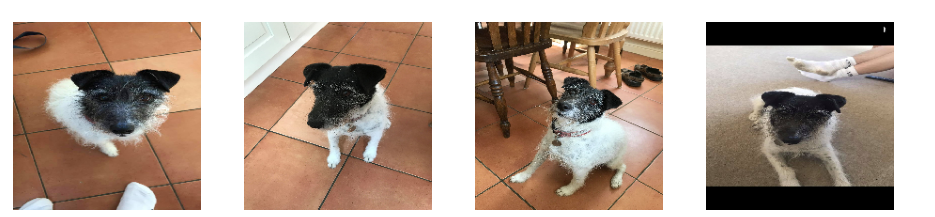

In [160]:
testImgs, testLabels = testData.next()
predictions = model.predict(testImgs)

#PlotData(testImgs, testLabels, dataClasses)
PlotData(testImgs, predictions, dataClasses, 20)
score = model.evaluate(testImgs, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])